#Data

###Data source of Hotel Booking Demand

Source : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?datasetId=511638&searchQuery=keras

Description : 

1. hotel: Type of Hotel:
    - Resort Hotel
    - City Hotel
2. is_canceled: Value indicating if the booking was canceled (1) or not (0)
3. lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. arrival_date_year: Year of arrival date
5. arrival_date_month: Month of arrival date with 12 categories: “January” to “December”
6. arrival_date_week_number: Week number of the arrival date
7. arrival_date_day_of_month: Day of the month of the arrival date
8. stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
9. stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
10. adults: Number of adults
11. children: Number of children
12. babies: Number of babies
13. meal: Type of meal booked. Categories are presented in standard hospitality meal packages:
	- Undefined/SC: no meal package
	- BB: Bed & Breakfast
	- HB: Half board (breakfast and one other meal – usually dinner)
	- FB: Full board (breakfast, lunch and dinner)
14. country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
15. market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
16. distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
17. is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)
18. previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
19. previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking
20. reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons
21. assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
22. booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
23. deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
	- No Deposit: no deposit was made
	- Non Refund: a deposit was made in the value of the total stay cost
	- Refundable: a deposit was made with a value under the total cost of stay
24. agent: ID of the travel agency that made the booking
25. company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
26. days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
27. customer_type: Type of booking, assuming one of four categories:
    - Contract: when the booking has an allotment or other type of contract associated to it
	- Group: when the booking is associated to a group
	- Transient: when the booking is not part of a group or contract, and is not associated to other transient booking
	- Transient-party: when the booking is transient, but is associated to at least other transient booking
28. adr: Average Daily Rate
29. required_car_parking_spaces: Number of car parking spaces required by the customer
30. total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
31. reservation_status: Reservation last status, assuming one of three categories:
	- Canceled: booking was canceled by the customer
	- Check-Out: customer has checked in but already departed
	- No-Show: customer did not check-in and did inform the hotel of the reason why
32. reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand 
when was the booking canceled or when did the customer checked-out of the hotel





#1.Prepare the environment

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

import time
from subprocess import check_output
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

# 2. Prepare the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/DADS 7202 Deep Learning/hotel_bookings.csv'
hotel_bookings_df = pd.read_csv(path)

Mounted at /content/drive


In [3]:
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
hotel_bookings_df.shape

(119390, 32)

#3. Data pre-processing

In [5]:
hotel_bookings_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
hotel_bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Check Null Data**

In [7]:
hotel_bookings_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
hotel_bookings_df.reset_index()
hotel_bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
hotel_bookings_df[hotel_bookings_df['deposit_type']=='Non Refund'][['is_canceled','deposit_type']].groupby('is_canceled').count()

,deposit_type
is_canceled,
0,93
1,14494


In [10]:
hotel_bookings_df['agent'].mode()

0    9.0
dtype: float64

In [11]:
hotel_bookings_df['children'].mean()

0.10388990333874994

In [12]:
hotel_bookings_df.drop(['company'],inplace=True,axis=1)
hotel_bookings_df['agent'].fillna(hotel_bookings_df['agent'].mode()[0],inplace=True)
hotel_bookings_df['country'].fillna(hotel_bookings_df['country'].mode()[0],inplace=True)
hotel_bookings_df['children'].fillna(hotel_bookings_df['children'].mean(),inplace=True)

In [13]:
categorical_columns=[]
continuous_columns=[]
for col in hotel_bookings_df.columns:
    if hotel_bookings_df[col].dtype!='object':
        continuous_columns.append(col)
    else:
        categorical_columns.append(col)
    

In [14]:
continuous_columns

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [15]:
categorical_columns

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

Numerical : rescaling values

In [16]:
hotel_bookings_df.loc[hotel_bookings_df.lead_time > 450,'lead_time'] = 450
hotel_bookings_df.loc[hotel_bookings_df.days_in_waiting_list > 125,'days_in_waiting_list'] = 125
hotel_bookings_df.loc[hotel_bookings_df.booking_changes > 10,'booking_changes'] = 10
hotel_bookings_df.loc[hotel_bookings_df.adults > 20,'adults'] = 20
hotel_bookings_df.loc[hotel_bookings_df.children > 4,'children'] = 4
hotel_bookings_df.loc[hotel_bookings_df.adr > 400,'adr'] = 400

In [17]:
hotel_bookings_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,450,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


#4. EDA

In [18]:
hotel_bookings_df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [19]:
bool_dict = {1:'Yes',0:'No'}

In [20]:
hotel_bookings_df['is_canceled']=hotel_bookings_df['is_canceled'].map(bool_dict)

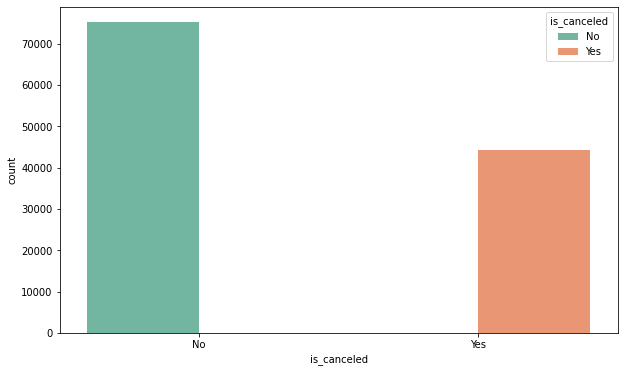

In [21]:
plt.figure(figsize=(10,6))
cancel_hotel_df=hotel_bookings_df.groupby(['is_canceled']).size().reset_index().rename(columns=({0:'count'}))
sns.barplot(x='is_canceled',y='count',data=cancel_hotel_df,hue='is_canceled', palette = 'Set2')

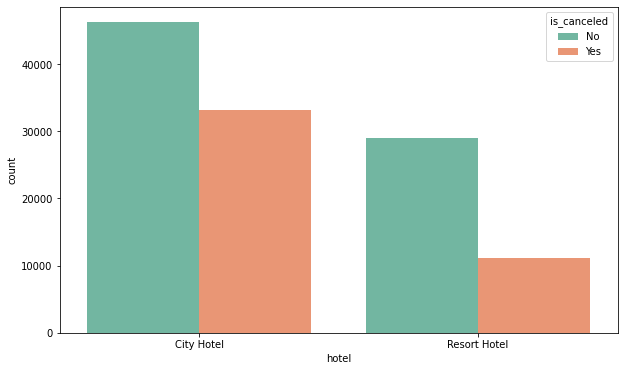

In [22]:
plt.figure(figsize=(10,6))
cancel_hotel_df=hotel_bookings_df.groupby(['hotel','is_canceled']).size().reset_index().rename(columns=({0:'count'}))
sns.barplot(x='hotel',y='count',data=cancel_hotel_df,hue='is_canceled', palette = 'Set2')

City Hotel has high number of cancellation compared to Resort

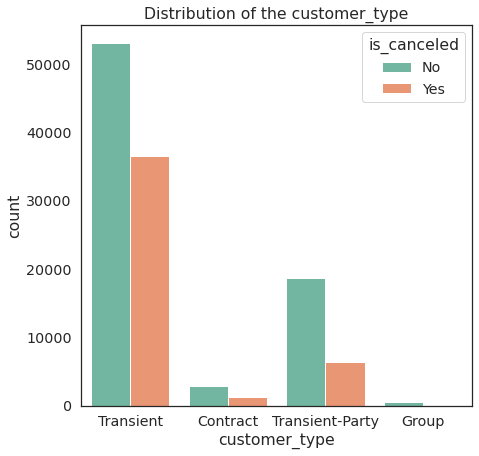

In [23]:
# Parameters
plt.rcParams['figure.figsize'] = [7, 7]
sns.set(style = 'white', font_scale = 1.3)

#1: canceled and 0: not canceled
hotel_bookings_df['is_canceled'].replace({1: 'Yes', 0: 'No'}, inplace = True)

# Plot
dist = sns.countplot(hotel_bookings_df['customer_type'], hue = 'is_canceled', data = hotel_bookings_df, palette = 'Set2');

dist.set(title = "Distribution of the customer_type");

Transient has high number of cancellation

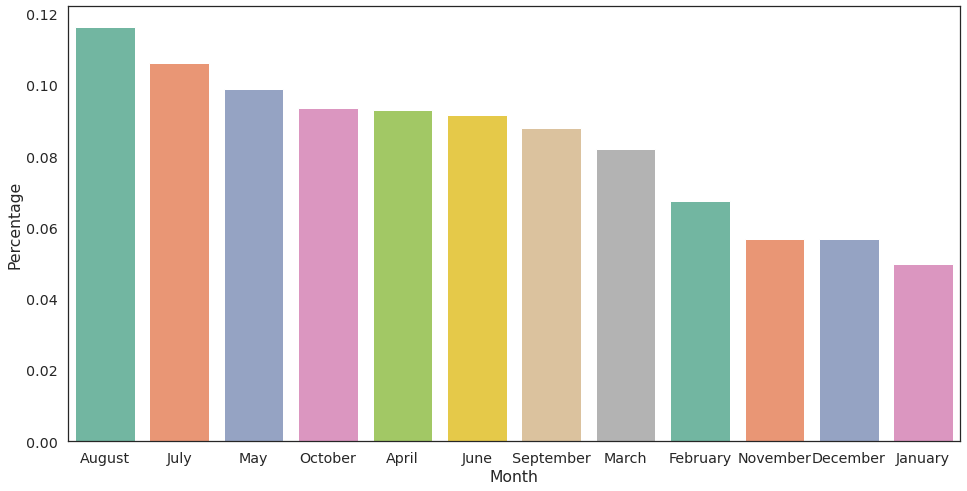

In [24]:
plt.figure(figsize=(16,8))
month_booking_df = hotel_bookings_df['arrival_date_month'].value_counts(normalize=True).rename_axis('Month').reset_index(name='Percentage')
sns.barplot(x='Month',y='Percentage',data=month_booking_df, palette = 'Set2')

Percentage of reservation in August month is highest compared to all other months

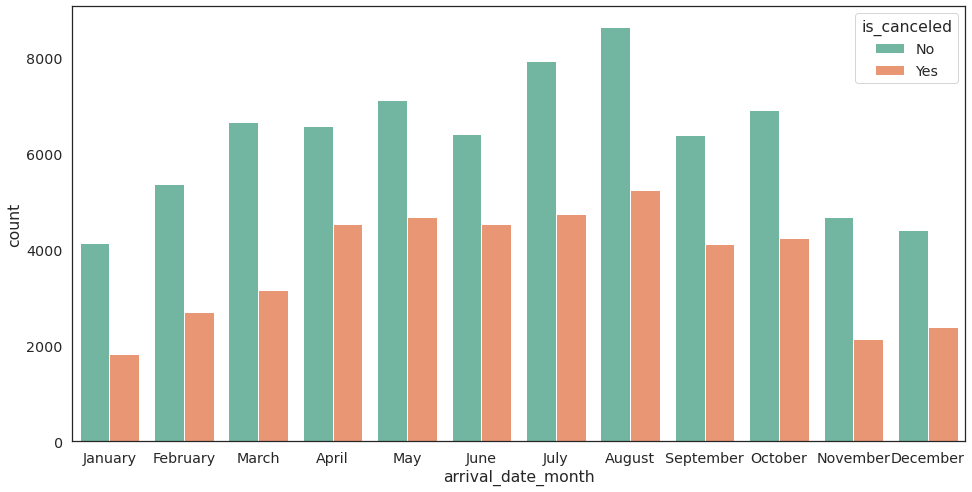

In [25]:
plt.figure(figsize=(16,8))
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_booking_df = hotel_bookings_df.groupby(['arrival_date_month','is_canceled']).size().reset_index().rename(columns=({0:'count'})).sort_values(['count'],ascending=False)
sns.barplot(x='arrival_date_month', y='count', data=month_booking_df, hue='is_canceled',order=Months, palette = 'Set2')

High range of cancellation is in the month of April,May and September. Start and end of the vacation.

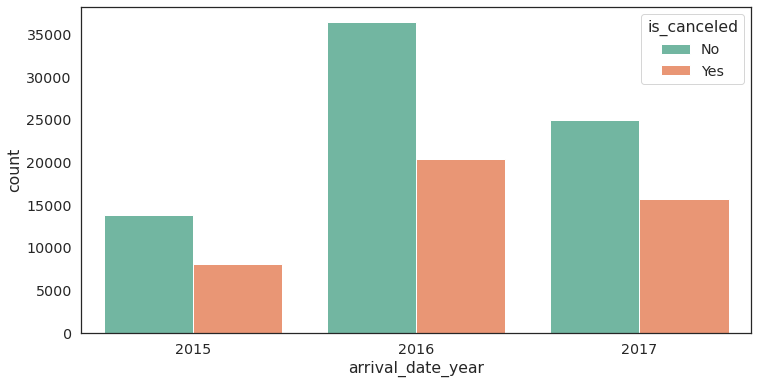

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=hotel_bookings_df, x='arrival_date_year', hue='is_canceled', palette = 'Set2')

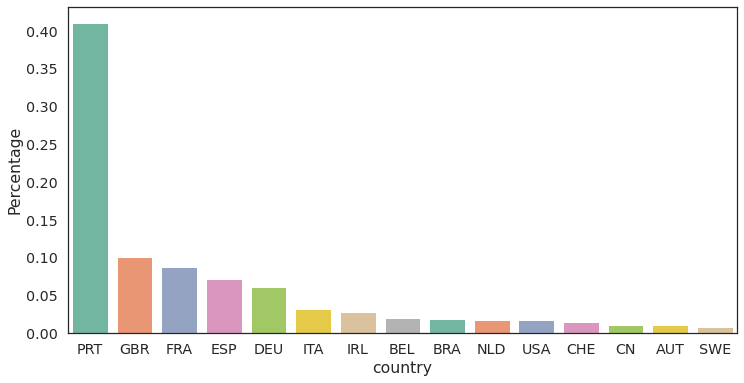

In [27]:
plt.figure(figsize=(12,6))
country_booking_df = hotel_bookings_df['country'].value_counts(normalize=True).rename_axis('country').reset_index(name='Percentage')
country_booking_df=country_booking_df.head(15)
sns.barplot(x='country', y='Percentage', data=country_booking_df, palette = 'Set2')

Portugal accounts for nearly 40% of the booking

In [28]:
country_booking=hotel_bookings_df.groupby(['country']).size().reset_index().rename(columns=({0:'count'}))
country_booking_canceled=hotel_bookings_df.groupby(['country','is_canceled']).size().reset_index().rename(columns=({0:'count'}))
country_booking=country_booking.merge(country_booking_canceled,on='country')
country_booking['percentage_cancellation']=country_booking['count_y']/country_booking['count_x']
country_booking_top=country_booking[(country_booking['percentage_cancellation']>=0.4)&(country_booking['is_canceled']=='Yes')&((country_booking['count_x']>50))].copy()
country_booking_top.rename(columns=({'count_x':'Total_Booking'}),inplace=True)
print(list(country_booking_top.country))

['AGO', 'ARE', 'CHN', 'KOR', 'MAR', 'PRT', 'TUR']


These are the countries with more than 40% of cancellation.<br>
Note: Here I have considered those countries with atleast 40 bookings

In [29]:
booking_year_children=hotel_bookings_df.groupby(['babies','arrival_date_year']).size().reset_index().rename(columns=({0:'count'}))
booking_year_children

,babies,arrival_date_year,count
0,0,2015,21783
1,0,2016,56261
2,0,2017,40429
3,1,2015,210
4,1,2016,437
5,1,2017,253
6,2,2015,2
7,2,2016,8
8,2,2017,5
9,9,2015,1


In [30]:
countries_with_booking=hotel_bookings_df.country.value_counts().reset_index(name="count").query("count > 50")

In [31]:
print(list(countries_with_booking['index']))

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD', 'USA', 'CHE', 'CN', 'AUT', 'SWE', 'CHN', 'POL', 'ISR', 'RUS', 'NOR', 'ROU', 'FIN', 'DNK', 'AUS', 'AGO', 'LUX', 'MAR', 'TUR', 'HUN', 'ARG', 'JPN', 'CZE', 'IND', 'KOR', 'GRC', 'DZA', 'SRB', 'HRV', 'MEX', 'EST', 'IRN', 'LTU', 'ZAF', 'BGR', 'NZL', 'COL', 'UKR', 'MOZ', 'CHL', 'SVK', 'THA', 'SVN', 'ISL', 'LVA', 'ARE', 'CYP', 'TWN']


deposit_type

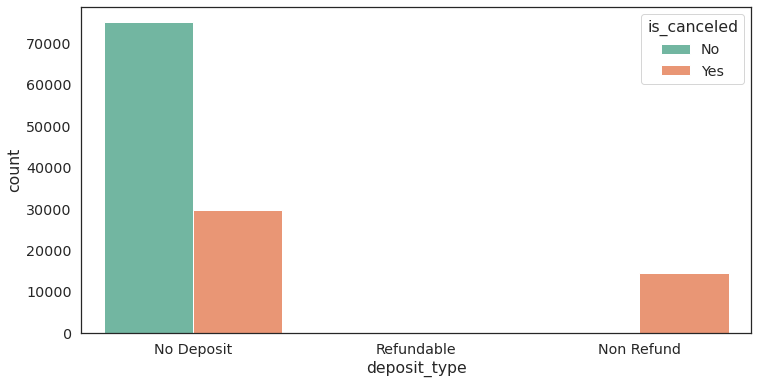

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data=hotel_bookings_df, x='deposit_type', hue='is_canceled', palette = 'Set2')

market_segment

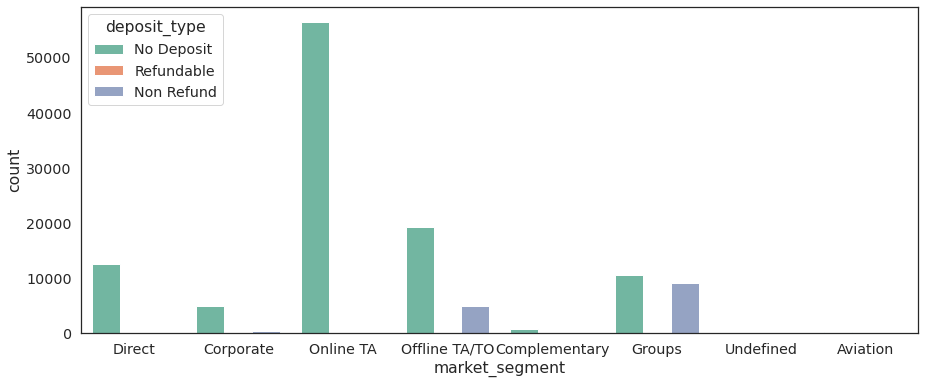

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(data=hotel_bookings_df,x='market_segment',hue='deposit_type', palette = 'Set2')

People book more with via online, with no deposit. While Groups and Offline are next with no deposit and Non refund

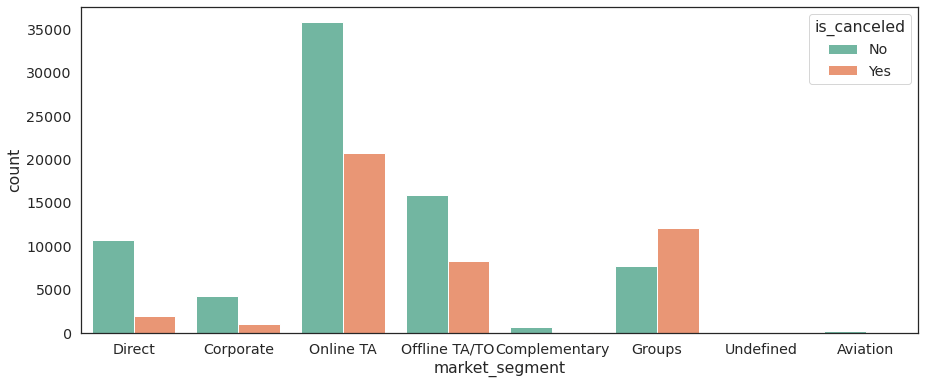

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(data=hotel_bookings_df, hue='is_canceled', x='market_segment', palette = 'Set2')

Cancellation is huge in Groups, even though it is booked as non refundable. Online booking also has high number of cancellation

total_of_special_requests

<Figure size 1440x432 with 0 Axes>

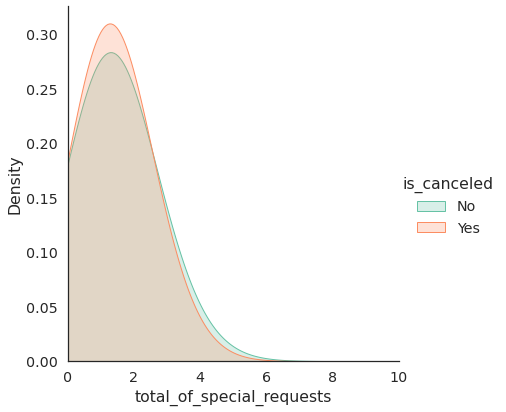

In [35]:
plt.figure(figsize=(20,6))
sns.FacetGrid(hotel_bookings_df[(hotel_bookings_df['total_of_special_requests']>0)], hue = 'is_canceled', palette = 'Set2',
             height = 6,xlim = (0,10)).map(sns.kdeplot, 'total_of_special_requests', shade = True,bw=2).add_legend()

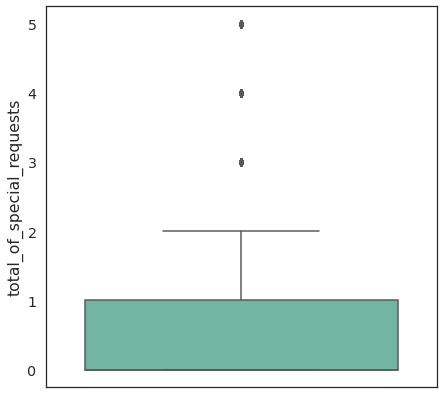

In [36]:
sns.boxplot(y = hotel_bookings_df["total_of_special_requests"], palette = 'Set2')

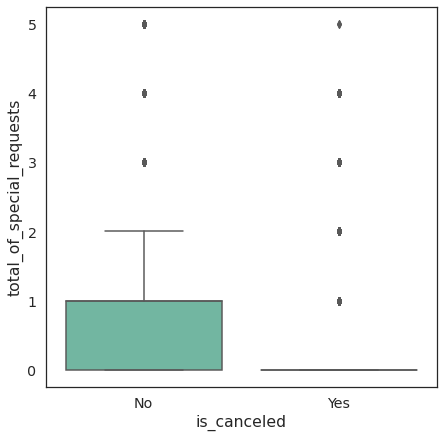

In [37]:
sns.boxplot(x= "is_canceled", y = "total_of_special_requests", data = hotel_bookings_df, palette = 'Set2')

lead_time

<Figure size 1440x432 with 0 Axes>

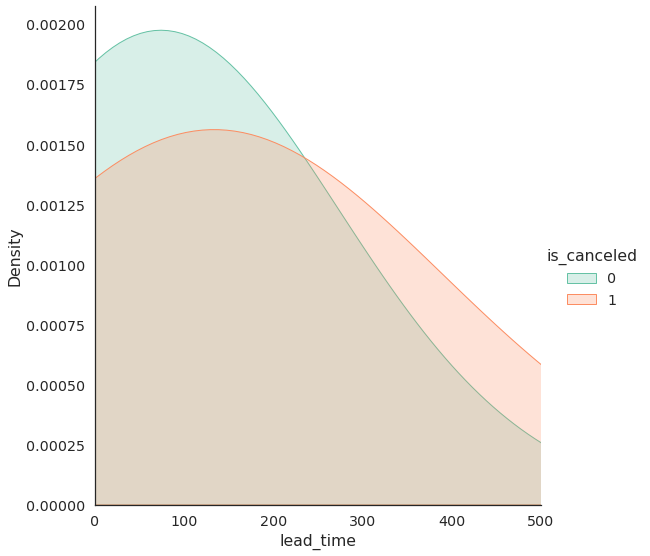

In [56]:
plt.figure(figsize=(20,6))
sns.FacetGrid(hotel_bookings_df[(hotel_bookings_df['lead_time']>0)], hue = 'is_canceled', palette = 'Set2',
             height = 8,xlim = (0,500)) .map(sns.kdeplot, 'lead_time', shade = True,bw=2).add_legend()

With lead time more 50 tends to have more cancellation

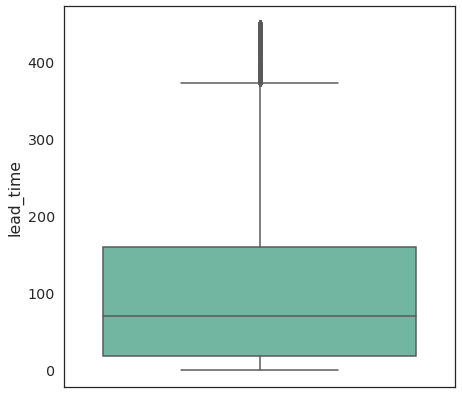

In [39]:
sns.boxplot(y = hotel_bookings_df["lead_time"], palette = 'Set2')

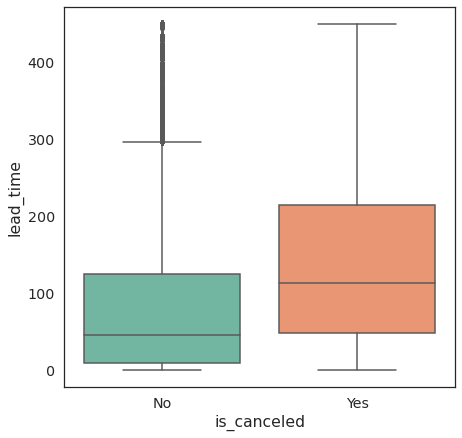

In [40]:
sns.boxplot(x= "is_canceled", y = "lead_time", data = hotel_bookings_df, palette = 'Set2')

adr

<Figure size 1440x432 with 0 Axes>

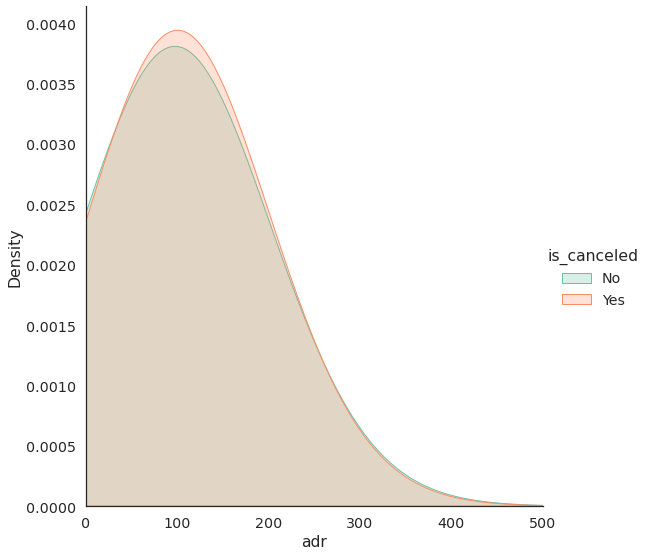

In [41]:
plt.figure(figsize=(20,6))
sns.FacetGrid(hotel_bookings_df[(hotel_bookings_df['adr']>0)], hue = 'is_canceled', palette = 'Set2',
             height = 8,xlim = (0,500)) .map(sns.kdeplot, 'adr', shade = True,bw=2).add_legend()

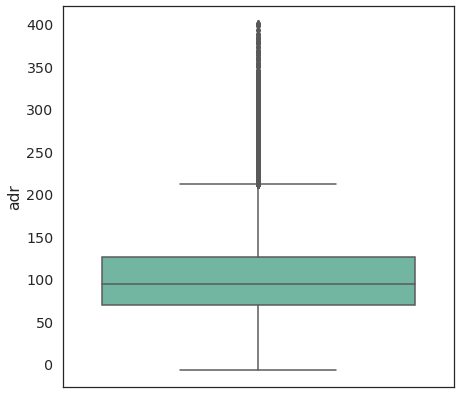

In [42]:
sns.boxplot(y = hotel_bookings_df["adr"], palette = 'Set2')

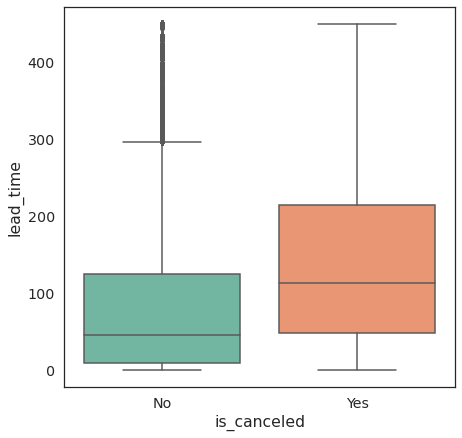

In [43]:
sns.boxplot(x= "is_canceled", y = "lead_time", data = hotel_bookings_df, palette = 'Set2')

In [45]:
mean_lead_time = hotel_bookings_df['lead_time'].mean()
std_lead_time = hotel_bookings_df['lead_time'].std()
print("Aveage Lead Time: ",mean_lead_time)
print("Standard Deviation Lead Time: ",std_lead_time)

Aveage Lead Time:  103.46701566295334
Standard Deviation Lead Time:  104.79069349811286


##### box plot

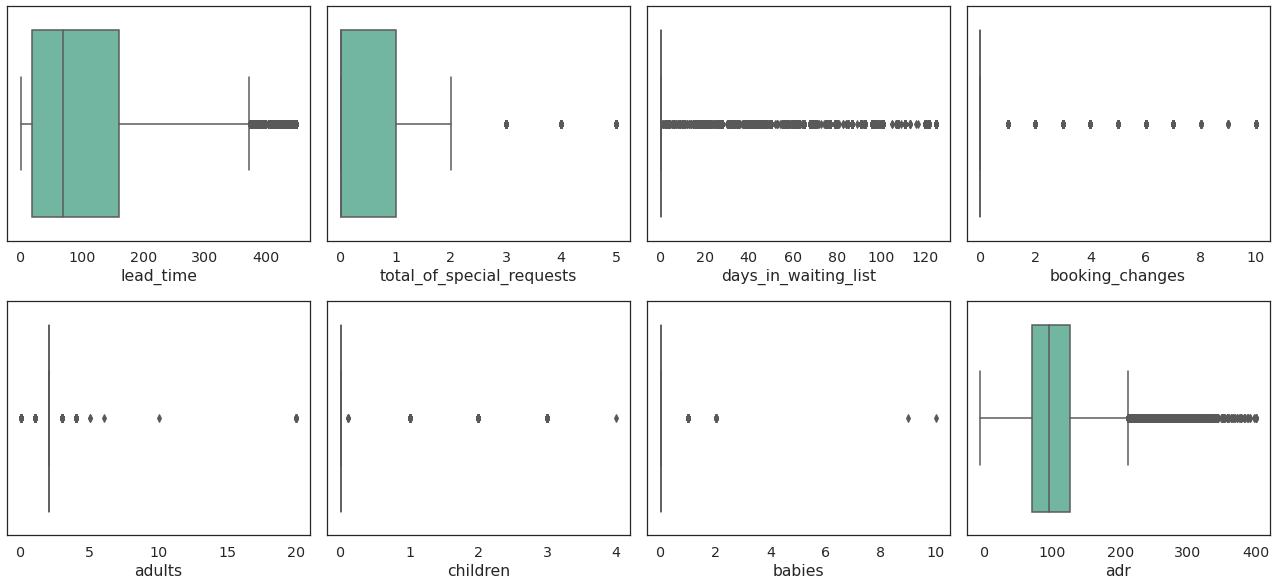

In [44]:
plt.figure(figsize=(18,16))
for i, col in enumerate(['lead_time', 'total_of_special_requests', 'days_in_waiting_list','booking_changes', 'adults','children', 'babies','adr']):
    plt.subplot(4,4,i+1)
    sns.boxplot(hotel_bookings_df[col], palette = 'Set2')
    plt.tight_layout()

##### correlation

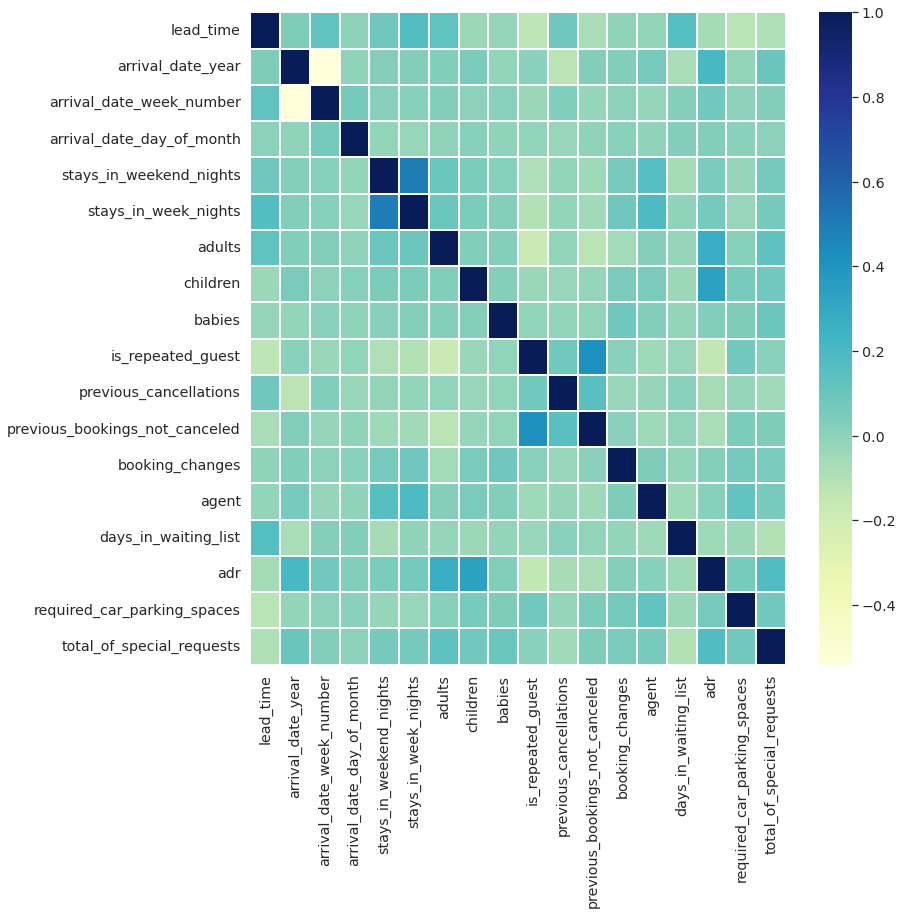

In [46]:
plt.figure(figsize = (12, 12))

corr = hotel_bookings_df.corr()
sns.heatmap(corr, linewidths = 1, cmap="YlGnBu") #annot = True, 
plt.show()

In [47]:
hotel_bookings_df['arrival_date_month'] = hotel_bookings_df['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
hotel_bookings_df['hotel'] = hotel_bookings_df['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

Create new 2 columns : total_members and total_stay

Drop 5 columns : adults, babies, children, stays_in_weekend_nights,stays_in_week_nights

In [ ]:
hotel_bookings_df["total_members"] = hotel_bookings_df["adults"] + hotel_bookings_df["children"] + hotel_bookings_df["babies"]
hotel_bookings_df["total_stay"] = hotel_bookings_df["stays_in_weekend_nights"]+ hotel_bookings_df["stays_in_week_nights"]
hotel_bookings_df.drop(columns = ['adults', 'babies', 'children', 'stays_in_weekend_nights', 'stays_in_week_nights'],inplace=True,axis=1)

categorical Label Encoder

In [48]:
le = LabelEncoder()
hotel_bookings_df['meal'] = le.fit_transform(hotel_bookings_df['meal'])
hotel_bookings_df['country'] = le.fit_transform(hotel_bookings_df['country'])
hotel_bookings_df['distribution_channel'] = le.fit_transform(hotel_bookings_df['distribution_channel'])
hotel_bookings_df['reserved_room_type'] = le.fit_transform(hotel_bookings_df['reserved_room_type'])
hotel_bookings_df['assigned_room_type'] = le.fit_transform(hotel_bookings_df['assigned_room_type'])
hotel_bookings_df['deposit_type'] = le.fit_transform(hotel_bookings_df['deposit_type'])
hotel_bookings_df['customer_type'] = le.fit_transform(hotel_bookings_df['customer_type'])
hotel_bookings_df['reservation_status'] = le.fit_transform(hotel_bookings_df['reservation_status'])
hotel_bookings_df['market_segment'] = le.fit_transform(hotel_bookings_df['market_segment'])
hotel_bookings_df['reservation_status_date'] = le.fit_transform(hotel_bookings_df['reservation_status_date'])
hotel_bookings_df['is_canceled'] = le.fit_transform(hotel_bookings_df['is_canceled'])

In [49]:
hotel_bookings_df=hotel_bookings_df[['hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_members',
       'total_stay', 'is_canceled']]

Dropping reservation status beacuse of it being highly co-related with depeneded column

In [50]:
hotel_bookings_df.drop(['reservation_status'],inplace=True,axis=1)

Dropping the highly correlated column

In [51]:
hotel_bookings_df.drop(['arrival_date_year','arrival_date_day_of_month','assigned_room_type'],inplace=True,axis=1)